In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import utils

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_fashion_mnist_data()

In [3]:
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.dense = dense
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.biases = self.add_weight(name='bias', shape=[self.dense.input_shape[-1]], initializer='zeros')
        return super().build(input_shape)

    def call(self, inputs, **kwargs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [4]:
utils.reset_session()

dense_1 = keras.layers.Dense(100, activation='selu')
dense_2 = keras.layers.Dense(30, activation='selu')

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])
tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation='selu'),
    DenseTranspose(dense_1, activation='sigmoid'),
    keras.layers.Reshape([28, 28])
])

autoencoder = keras.models.Sequential([tied_encoder, tied_decoder])

optimizer = keras.optimizers.SGD(lr=1.5)

autoencoder.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[utils.rounded_accuracy])

history = autoencoder.fit(x_train, x_train, 
    epochs=10,
    validation_data=(x_val, x_val)
)

Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3269 - rounded_accuracy: 0.8960 - val_loss: 0.3079 - val_rounded_accuracy: 0.9082
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2975 - rounded_accuracy: 0.9224 - val_loss: 0.2952 - val_rounded_accuracy: 0.9284
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2920 - rounded_accuracy: 0.9274 - val_loss: 0.3023 - val_rounded_accuracy: 0.9077
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2889 - rounded_accuracy: 0.9302 - val_loss: 0.2880 - val_rounded_accuracy: 0.9332
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2865 - rounded_accuracy: 0.9325 - val_loss: 0.2873 - val_rounded_accuracy: 0.9316
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2850 - rounded_accuracy: 0.9340 - val_loss: 0.2861 - val_rounded_accuracy: 0.9354
Epoch 7/10
1719/1719 [==================

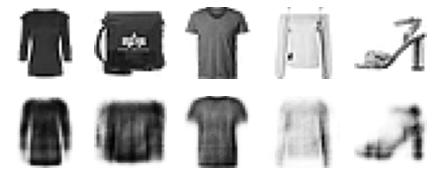

In [5]:
utils.reconstruct(autoencoder, x_val[:5])